# Predicting telecom call drops with AI

Problem Statement:

    In the telecom domain, a call drop is a situation where a call on a wireless network is disconnected before the caller ends the call. These call drops can happen for several reasons. Inadequate coverage such as lack of tower infrastructure, network traffic, number of calls at a given tower, time of call, weather status can greatly affect the stability of the network. Sometimes, the network capacity is simply not being ramped up at the same pace as usage, which results in overloaded networks.

Objective:

    We must understand the reasons for the call drops along with the contributing factors that influence the call drops for the selected tower.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading Datasets
weather = pd.read_csv('weather.csv')

In [3]:
tower = pd.read_csv('tower.csv')

In [4]:
tower.shape

(6156, 7)

## Feature Engineering

In [5]:
tower.isna().sum()

outgoing_site_id         1830
Start_Time_MM_DD_YYYY    1830
Total Calls              1830
Traffic                  1830
lat                      1830
long                     1830
Call Dropped             1830
dtype: int64

In [6]:
#Converting date into standard format
tower['Start_Time_MM_DD_YYYY'] = pd.to_datetime(tower['Start_Time_MM_DD_YYYY'], format='%Y%m%d')

In [7]:
weather['Start_Time_MM_DD_YYYY'] = pd.to_datetime(weather['Start_Time_MM_DD_YYYY'],format = '%Y%m%d')

In [8]:
tower.shape

(6156, 7)

In [9]:
weather.isna().sum()

outgoing_site_id         0
Start_Time_MM_DD_YYYY    0
Start_Time_HH_MM_SS_s    0
Weather                  0
dtype: int64

Note:
    There are no Nan values in weather dataset

In [10]:
tower.columns

Index(['outgoing_site_id', 'Start_Time_MM_DD_YYYY', 'Total Calls', 'Traffic',
       'lat', 'long', 'Call Dropped'],
      dtype='object')

In [11]:
weather.columns

Index(['outgoing_site_id', 'Start_Time_MM_DD_YYYY', 'Start_Time_HH_MM_SS_s',
       'Weather'],
      dtype='object')

In [12]:
#Renaming columns
col_names = {'outgoing_site_id':'site_id','Start_Time_MM_DD_YYYY':'YYY-MM_DD'}
weather.rename(columns = col_names,inplace = True)

In [187]:
tower.head(3)

,outgoing_site_id,Start_Time_MM_DD_YYYY,Total Calls,Traffic,lat,long,Call Dropped
0,1717.0,2017-01-01,499.0,Low,40.710567,-74.007338,16.0
1,1717.0,2017-01-01,554.0,Medium,40.710567,-74.007338,44.0
2,1717.0,2017-01-01,301.0,Low,40.710567,-74.007338,17.0


In [14]:
weather.head(3)

,site_id,YYY-MM_DD,Start_Time_HH_MM_SS_s,Weather
0,1717,2017-01-01,00:00 to 4:00,Smoke
1,1717,2017-01-01,4:00 to 8:00,Shallow Fog
2,1717,2017-01-01,8:00 to 12:00,Shallow Fog


In [15]:
#Concatenating the datasets
df = pd.concat([weather,tower],axis = 1)

In [16]:
df.columns

Index(['site_id', 'YYY-MM_DD', 'Start_Time_HH_MM_SS_s', 'Weather',
       'outgoing_site_id', 'Start_Time_MM_DD_YYYY', 'Total Calls', 'Traffic',
       'lat', 'long', 'Call Dropped'],
      dtype='object')

In [17]:
df.drop(columns = ['outgoing_site_id', 'Start_Time_MM_DD_YYYY'],inplace = True)

In [18]:
df.head(3)

,site_id,YYY-MM_DD,Start_Time_HH_MM_SS_s,Weather,Total Calls,Traffic,lat,long,Call Dropped
0,1717,2017-01-01,00:00 to 4:00,Smoke,499.0,Low,40.710567,-74.007338,16.0
1,1717,2017-01-01,4:00 to 8:00,Shallow Fog,554.0,Medium,40.710567,-74.007338,44.0
2,1717,2017-01-01,8:00 to 12:00,Shallow Fog,301.0,Low,40.710567,-74.007338,17.0


In [19]:
df.shape

(6156, 9)

In [20]:
df.isna().sum()

site_id                     0
YYY-MM_DD                   0
Start_Time_HH_MM_SS_s       0
Weather                     0
Total Calls              1830
Traffic                  1830
lat                      1830
long                     1830
Call Dropped             1830
dtype: int64

In [21]:
#Checking for Nan values
df[df['Call Dropped'].isna()]

,site_id,YYY-MM_DD,Start_Time_HH_MM_SS_s,Weather,Total Calls,Traffic,lat,long,Call Dropped
99,1717,2017-01-19,16:00 to 20:00,Fog,NaN,NaN,NaN,NaN,NaN
100,1717,2017-01-19,20:00 to 23:59,Fog,NaN,NaN,NaN,NaN,NaN
101,1717,2017-01-20,00:00 to 4:00,Smoke,NaN,NaN,NaN,NaN,NaN
102,1717,2017-01-20,4:00 to 8:00,Shallow Fog,NaN,NaN,NaN,NaN,NaN
103,1717,2017-01-20,8:00 to 12:00,Shallow Fog,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2047,3066,2017-01-30,20:00 to 23:59,Haze,NaN,NaN,NaN,NaN,NaN
2048,3066,2017-01-31,00:00 to 4:00,Light Rain,NaN,NaN,NaN,NaN,NaN
2049,3066,2017-01-31,4:00 to 8:00,Light Drizzle,NaN,NaN,NaN,NaN,NaN
2050,3066,2017-01-31,8:00 to 12:00,Drizzle,NaN,NaN,NaN,NaN,NaN


Note:
    As you can see the 1830 records with all having Nan values so its better we drop them

In [22]:
df.dropna(axis = 0,inplace = True)

In [23]:
df.isna().sum()

site_id                  0
YYY-MM_DD                0
Start_Time_HH_MM_SS_s    0
Weather                  0
Total Calls              0
Traffic                  0
lat                      0
long                     0
Call Dropped             0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4326 entries, 0 to 6155
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   site_id                4326 non-null   int64         
 1   YYY-MM_DD              4326 non-null   datetime64[ns]
 2   Start_Time_HH_MM_SS_s  4326 non-null   object        
 3   Weather                4326 non-null   object        
 4   Total Calls            4326 non-null   float64       
 5   Traffic                4326 non-null   object        
 6   lat                    4326 non-null   float64       
 7   long                   4326 non-null   float64       
 8   Call Dropped           4326 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 287.3+ KB


In [25]:
df.head(3)

,site_id,YYY-MM_DD,Start_Time_HH_MM_SS_s,Weather,Total Calls,Traffic,lat,long,Call Dropped
0,1717,2017-01-01,00:00 to 4:00,Smoke,499.0,Low,40.710567,-74.007338,16.0
1,1717,2017-01-01,4:00 to 8:00,Shallow Fog,554.0,Medium,40.710567,-74.007338,44.0
2,1717,2017-01-01,8:00 to 12:00,Shallow Fog,301.0,Low,40.710567,-74.007338,17.0


In [26]:
df['Weather'].unique() ## Since this feature has categories we will apply one hot encoding

array(['Smoke', 'Shallow Fog', 'Fog', 'Partly Cloudy', 'Mostly Cloudy',
       'Volcanic Ash', 'Scattered Clouds', 'Clear', 'Haze', 'Rain',
       'Light Thunderstorms and Rain', 'Light Rain', 'Light Drizzle',
       'Drizzle'], dtype=object)

In [27]:
df['Traffic'].unique()  ## Since this feature has an order we will give values which has a specific rank like 0,1,2,3

array(['Low', 'Medium', 'High'], dtype=object)

In [28]:
Weather_n = pd.get_dummies(df['Weather'],drop_first = True)

In [29]:
traffic_dict = {'Low':0,'Medium':1,'High':2}
df['Traffic'] = df['Traffic'].map(traffic_dict)

In [30]:
df['Start_Time_HH_MM_SS_s'].unique()

array(['00:00 to 4:00', '4:00 to 8:00', '8:00 to 12:00', '12:00 to 16:00',
       '16:00 to 20:00', '20:00 to 23:59'], dtype=object)

In [31]:
Time_n = pd.get_dummies(df['Start_Time_HH_MM_SS_s'],drop_first = True)

In [32]:
df2 = pd.concat([df,Weather_n,Time_n],axis = 1)

In [33]:
df2.columns

Index(['site_id', 'YYY-MM_DD', 'Start_Time_HH_MM_SS_s', 'Weather',
       'Total Calls', 'Traffic', 'lat', 'long', 'Call Dropped', 'Drizzle',
       'Fog', 'Haze', 'Light Drizzle', 'Light Rain',
       'Light Thunderstorms and Rain', 'Mostly Cloudy', 'Partly Cloudy',
       'Rain', 'Scattered Clouds', 'Shallow Fog', 'Smoke', 'Volcanic Ash',
       '12:00 to 16:00', '16:00 to 20:00', '20:00 to 23:59', '4:00 to 8:00',
       '8:00 to 12:00'],
      dtype='object')

In [34]:
df3 = df2.drop(columns = ['Weather','Start_Time_HH_MM_SS_s','YYY-MM_DD'])

In [45]:
df3.head(3)

,site_id,Total Calls,Traffic,lat,long,Call Dropped,Drizzle,Fog,Haze,Light Drizzle,...,Rain,Scattered Clouds,Shallow Fog,Smoke,Volcanic Ash,12:00 to 16:00,16:00 to 20:00,20:00 to 23:59,4:00 to 8:00,8:00 to 12:00
0,1717,499.0,0,40.710567,-74.007338,16.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1717,554.0,1,40.710567,-74.007338,44.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1717,301.0,0,40.710567,-74.007338,17.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Exploratory Data Analysis and Visualizations

Text(0.5, 1.0, 'Total Amount of Traffic on each Tower')

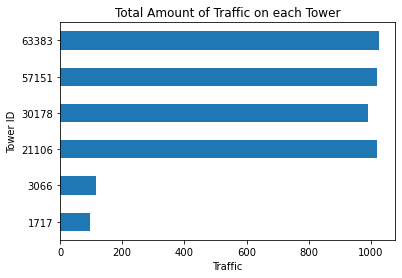

In [142]:
df3.groupby('site_id')['Traffic'].sum().plot(kind = 'barh')
plt.xlabel('Traffic')
plt.ylabel('Tower ID')
plt.title('Total Amount of Traffic on each Tower')

Text(0.5, 1.0, 'Percentage of Total calls by from each Tower')

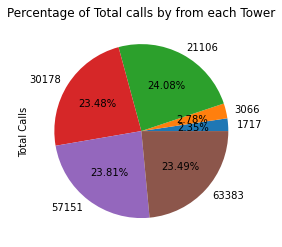

In [127]:
df3.groupby('site_id')['Total Calls'].sum().plot(kind = 'pie',autopct='%1.2f%%')
plt.title('Percentage of Total calls by from each Tower')

Text(0.5, 1.0, 'Percentage of Calls dropped from each Tower')

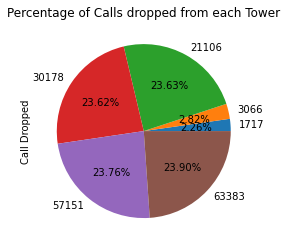

In [128]:
df3.groupby('site_id')['Call Dropped'].sum().plot(kind = 'pie',autopct='%1.2f%%')
plt.title('Percentage of Calls dropped from each Tower')

<AxesSubplot:xlabel='Weather', ylabel='Call Dropped'>

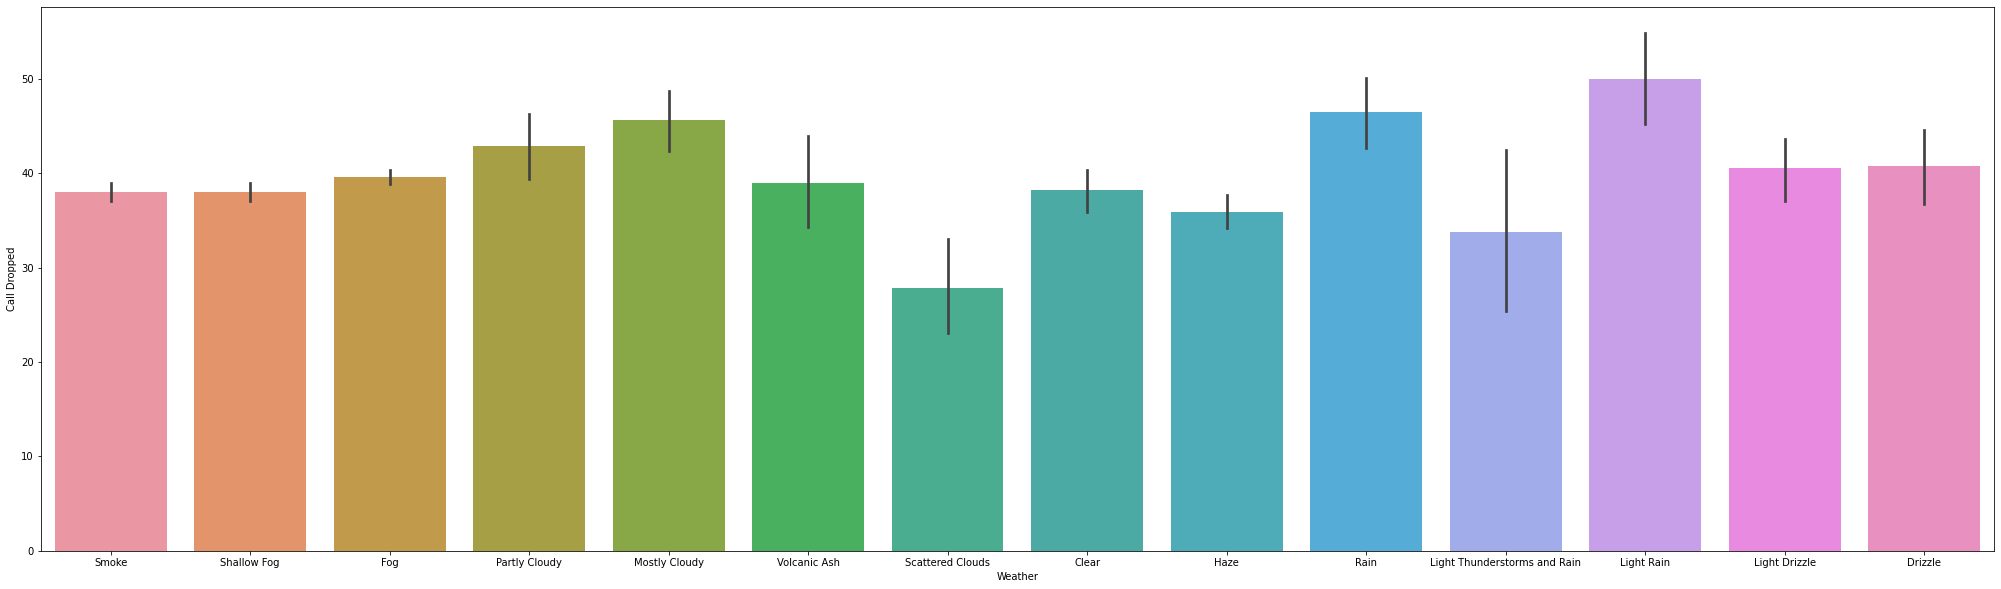

In [188]:
plt.figure(figsize= (35,10))
sns.barplot(x = df['Weather'],y = df['Call Dropped'])

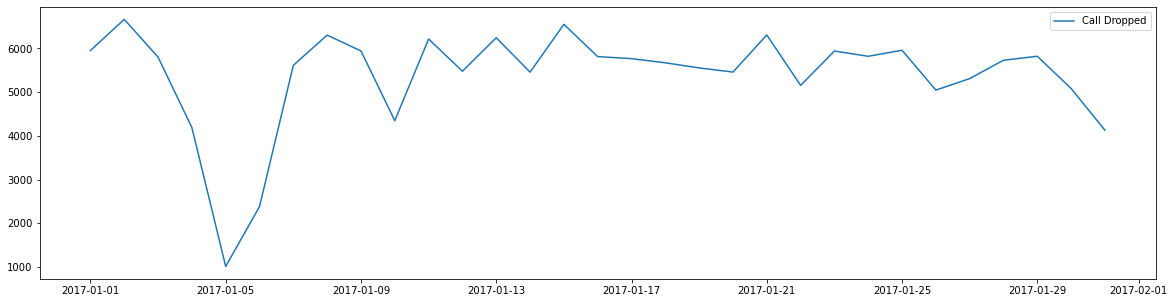

In [184]:
call_drop_timeseries = pd.DataFrame(df.groupby('YYY-MM_DD')['Call Dropped'].sum())
# totalcalls_timeseries = pd.DataFrame(df.groupby('YYY-MM_DD')['Total Calls'].sum())

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
ax.plot(call_drop_timeseries.index,call_drop_timeseries.values,'-',label = 'Call Dropped')
# ax.plot(totalcalls_timeseries.index,totalcalls_timeseries.values,'-',label = 'Total Calls')
plt.legend()

Note:
    
    From the above visuals we can understand that the towers which has huge traffic has experienced abundant amount of call drops.When we even observe weather feature, we understand when there is Rain, light rain, cloudy weather there are heavy call drops.The company has experienced high call drops, which probably hit more than 6000 drops that too many times in a month. 

## Model Training

In [36]:
x = df3.drop(columns = ['Call Dropped'])
y = df3[['Call Dropped']]

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

### Model-1 Decision Tree Regressor

In [38]:
#Model-1 Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor(criterion = 'mse')
decision_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [39]:
y_pred1 = decision_reg.predict(x_test)

#### Model Score

In [40]:
from sklearn.metrics import r2_score
print(r"Model Score is {}".format(r2_score(y_test,y_pred1)))

Model Score is 0.9813137428643093


#### Feature Importance

In [42]:
#Feature Importance
decision_reg.feature_importances_

array([1.00267511e-02, 9.44450055e-02, 8.31474596e-01, 1.15340935e-02,
       1.01577062e-02, 1.19986970e-03, 4.62712949e-03, 1.47092582e-03,
       9.21531520e-04, 1.24140956e-03, 3.39283307e-04, 7.97793239e-04,
       1.16666825e-03, 2.79440515e-04, 2.31079771e-04, 3.63335079e-03,
       3.36949709e-03, 1.07033533e-03, 5.89844930e-03, 3.35875674e-03,
       6.54802329e-03, 2.81271731e-03, 3.39558642e-03])

#### Cross Validation

In [43]:
#Cross Validation
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits=10)
cross_validation = cross_val_score(decision_reg, x, y, cv=kfold)

In [44]:
print("Cross Validation Score is {}".format(np.mean(cross_validation)))

Cross Validation Score is 0.9834203209470012


### Model-2 KNN Regressor

In [233]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 3)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [236]:
y_pred2 = knn_reg.predict(x_test)

#### Model Score

In [237]:
from sklearn.metrics import r2_score
print(r"Model Score is {}".format(r2_score(y_test,y_pred2)))

Model Score is 0.8973238140115849


#### Cross Validation

In [238]:
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits=10)
cross_validation = cross_val_score(knn_reg, x, y, cv=kfold)

In [239]:
print("Cross Validation Score is {}".format(np.mean(cross_validation)))

Cross Validation Score is 0.9105504363174189
